import packages

In [17]:
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt, numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Load dataset

In [18]:
data = datasets.load_iris()
# data

In [19]:
X, y = data['data'], data['target']
X.shape
# y.shape

(150, 4)

In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=23)

data preprocessing

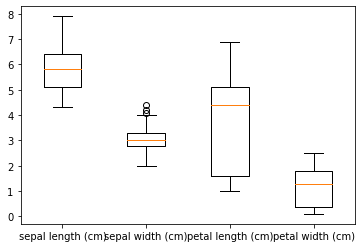

In [21]:
plt.boxplot(X_train, labels = data['feature_names']);

In [22]:
# eliminate outliers
Q01, Q03 = np.quantile(X[:, 1], [0.25, 0.75])
IQR = Q03 - Q01
lower_bound = max(Q01 - 1.5 * IQR, X[:, 1].min())
upper_bound = min(Q03 + 1.5 * IQR, X[:, 1].max())

In [23]:
outlier_indices = np.where((X[:, 1] < lower_bound) & (X[:, 1] > upper_bound))

In [24]:
np.delete(X_train, outlier_indices, axis=0).shape

(112, 4)

In [81]:
X_train, y_train = np.delete(X_train, outlier_indices, axis=0), np.delete(y_train, outlier_indices, axis=0)

data normalization

In [82]:
transformer = Normalizer().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

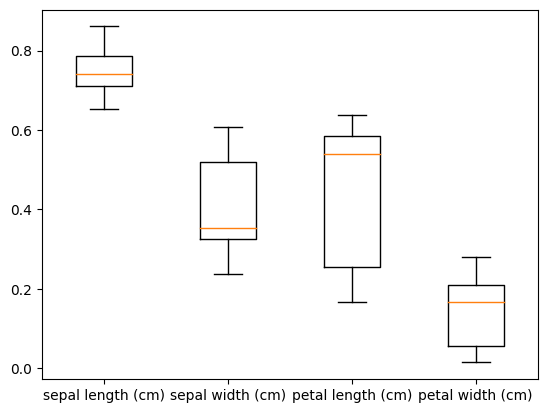

In [83]:
plt.boxplot(X_train, labels = data['feature_names']);

classification

In [94]:
# KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = (y_pred == y_test).sum() /  len(y_pred)
accuracy

1.0

In [95]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = (y_pred == y_test).sum() /  len(y_pred)
accuracy

1.0

boundary

<ipython-input-100-069175b0d678>:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-100-069175b0d678>:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-100-069175b0d678>:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-100-069175b0d678>:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-100-069175b0d678>:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


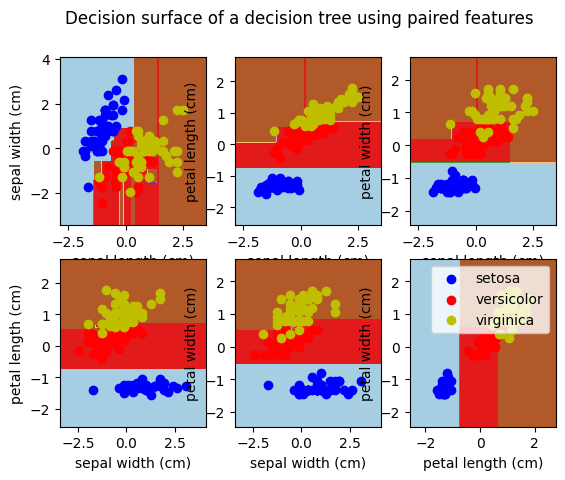

In [100]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show();